# Statistics Review with numpy

### Simulation # 1

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline

pd.options.display.max_rows = 10

###### Generate 100 random variables with mean = 0 and std = 1. Put them into a dataframe and plot their DENSITY using pandas (remember df.plot.`<tab>` to get the types of plots). Hint: use np.random.`<tab>`

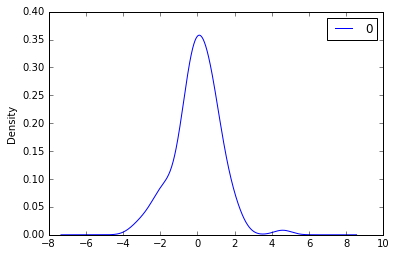

In [2]:
df1 = pd.DataFrame(np.random.normal(0, 1, 100))
df1.plot.density()

###### Generate 100 random variables with mean = .5 and std = 1. Add this series to the previous data frame and plot the distributions of both using pd.plot.`<tab>`

In [3]:
df2 = pd.DataFrame(np.random.normal(0.5, 1, 100))
df3 = df1 + df2

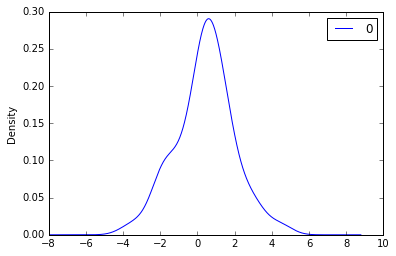

In [4]:
df3.plot.density()

###### Imagine we didn't know how the data was generated, and we wanted to test to see if d2 is greater than d1. How would we do that? Well, first we could compare means, so do that below:

In [33]:
"df1" if int(df1.mean(0,0)) > int(df2.mean(0,0)) else "df2"

'df2'

###### Use scipy's stats functions to run a t-test. Did the test find the difference significant? Rerun the data again from the top, what do you get now?

In [34]:
stats.ttest_ind(df1,df2)

Ttest_indResult(statistic=array([-2.66436748]), pvalue=array([ 0.00834909]))

In [35]:
df1.mean()

0   -0.002726
dtype: float64

###### Create a function that takes in three parameters: mean_1, mean_2, and size of the array. This function should run a loop 10000 times, and simulate normal random variables with N(mean_1, 1) and N(mean_2, 1) and size=`size`. It should then take the mean of both arrays and compare. The function should return the # of times that the mean of array_1 is bigger than the mean of array_2. 

In [144]:
def max_mean(mean_1, mean_2, arr_len):
    count = 0
    for i in xrange(10000):
        array_1 = np.random.normal(mean_1, 1, arr_len)
        array_2 = np.random.normal(mean_2, 1, arr_len)
        if array_1.mean() > array_2.mean():
            count = count + 1
        else:
             next
        
    return count

In [145]:
max_mean(1, 1, 100)

4909


###### Pass in 0.1 for mean_1 and 0 for mean_2. Start with size = 10. What % of the time did the test find that mean_1 is greater? How does the % of times that the mean of the distribution with mean_1 is greater than that with mean_2 change as the variable size increases? Plot this.


In [157]:
percent = max_mean(0.1, 0, 10)

5918


TypeError: int() argument must be a string or a number, not 'NoneType'

###### Implement the same function as above, but this time use `stats.ttest_ind()` to determine if there is a difference in means. Note: ideally you would want to use a one-sided t-test, (which tests specifically if mean_1 is greater than mean_2. However, we haven't covered this so welcome to use the function above.

###### How does the accuracy of the test change as you change mean_1 from 0 to 1 by 0.1 (keeping mean_2 at 0)? What about when you change the size? The % of times a test actually finds that there is a difference is called the **power**.

###### What if you pass in equal means (i.e. both 0) for mean_1 and mean_2. What % of the time does the test say there is a difference?

###### How can you change it so the % of times the test incorrectly determines a difference goes down? Why wouldn't you always want to do this?

### Simulation # 2

###### You are A/B testing your signup flow, and you expect the change in your flow to increase your conversion rate from 23% to 26%. How many people should you have in each group in order to have a power of 80% with 95% confidence when testing whether or not there is a difference between group 1 and group 2. 

Hint: To model this, you need to simulate two arrays of 1s and 0s with those probabilities. Your code should include this line: `np.random.binomial(1, .23, num_people)`